In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Load Data Set


In [173]:
file_path = '/Users/pgeete/ML_Practice/Bike Rental/day.csv'
data = pd.read_csv(file_path)

In [174]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [175]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [176]:
data .describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [178]:
# so we can say that we have no null values for each column
# dteday is of type object but we don't need this colum as we have year and month with us 

In [179]:
#Preprocessing Data 

In [180]:
#let's rename some column for better understanding 

data = data.rename(columns={'yr' : 'year' , 'mnth' : 'month' , 'weathersit' : 'weather' , 'hum' : 'humidity', 'cnt' : 'count'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
# mapping the categorical column with label instead of numbers 

In [182]:
data['season'] = data['season'].map({1: 'spring', 2:'summer', 3: 'fall', 4: 'winter'})
data['year'] = data['year'].map({0:'2018', 1:'2019'})
data['holiday'] = data['holiday'].map({0:'No', 1: 'Yes'})
data['workingday'] = data['workingday'].map({0: 'No', 1:'Yes'})
data['weather'] = data['weather'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'
})

In [183]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,2018,1,No,6,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,No,0,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,No,1,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,No,2,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,No,3,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [184]:
# Drop the column not needed for analysis


In [185]:
data.drop(columns=["instant","dteday","casual","registered"],axis=1,inplace =True)
data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,1,No,6,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,No,0,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,No,1,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,No,2,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,No,3,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [186]:
#Univariate Analysis 

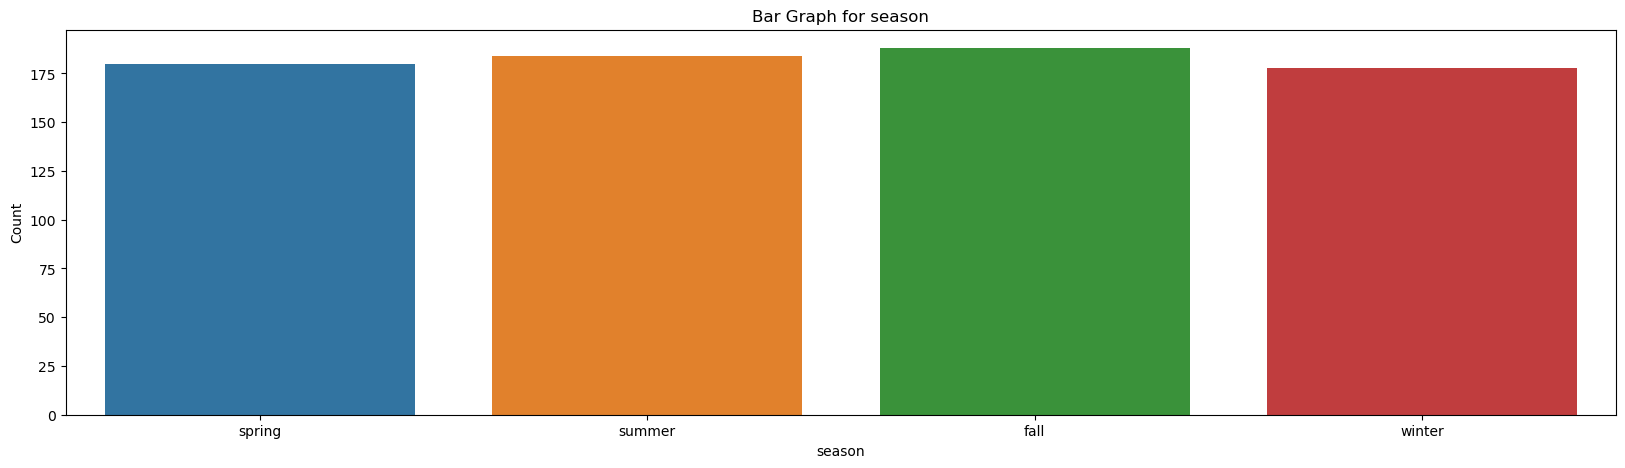

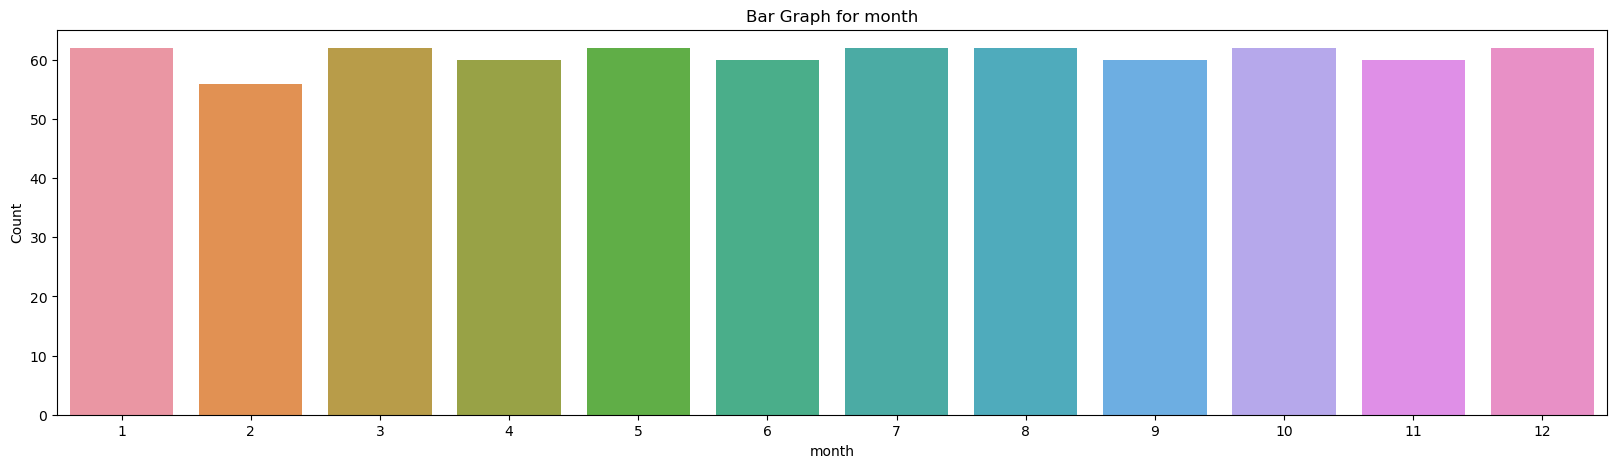

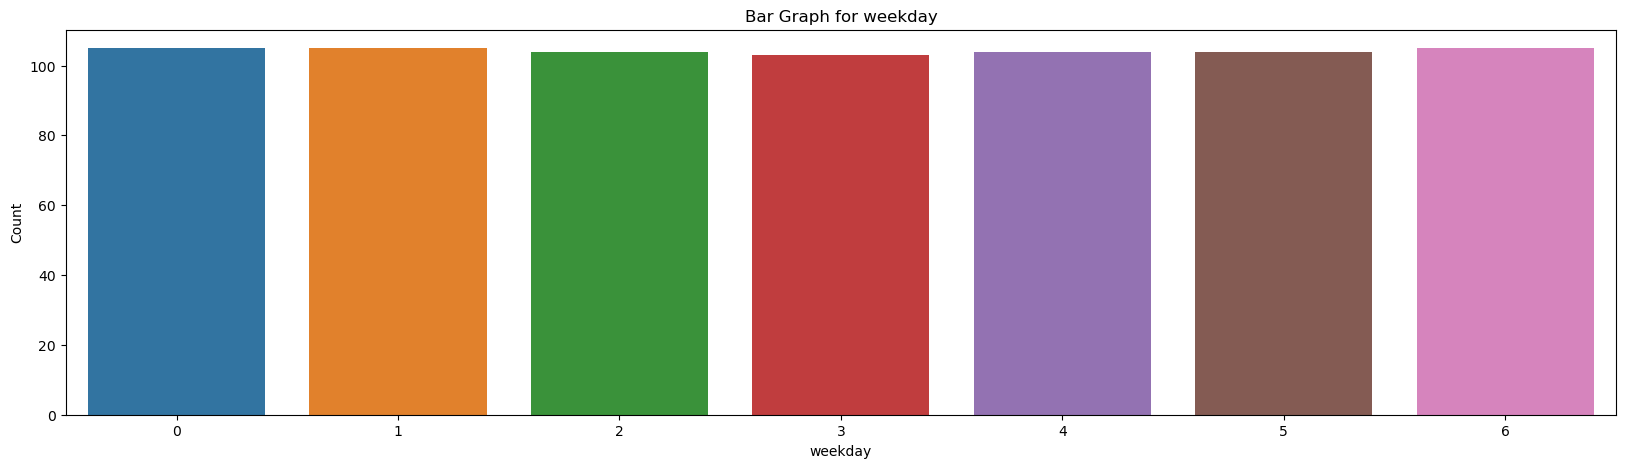

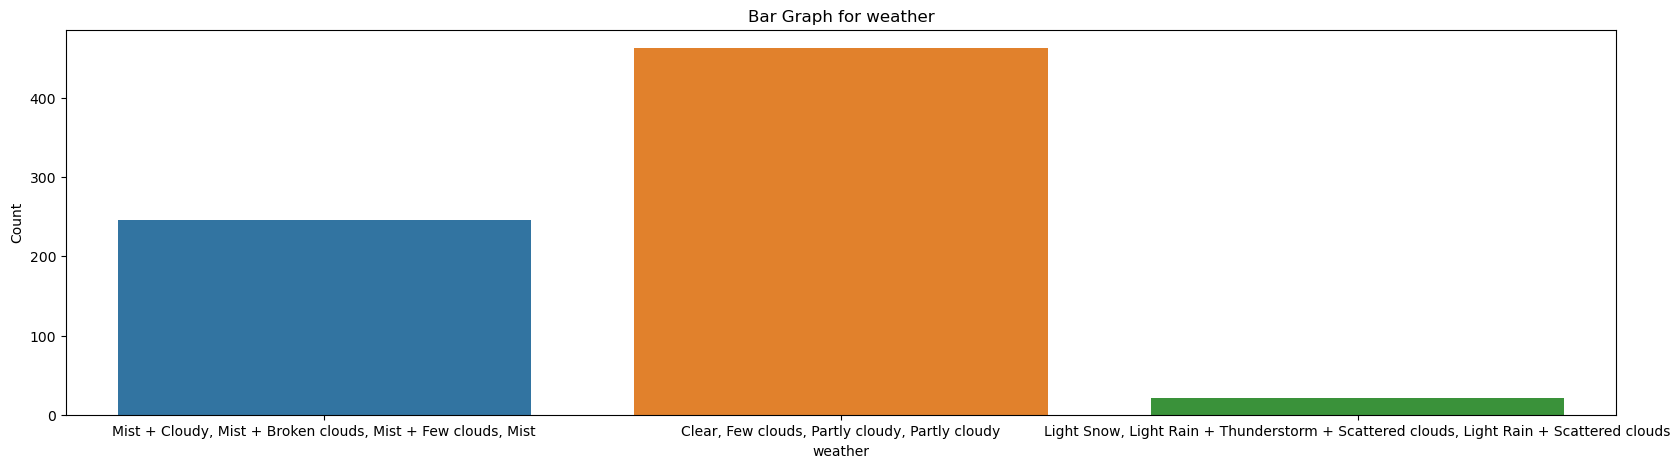

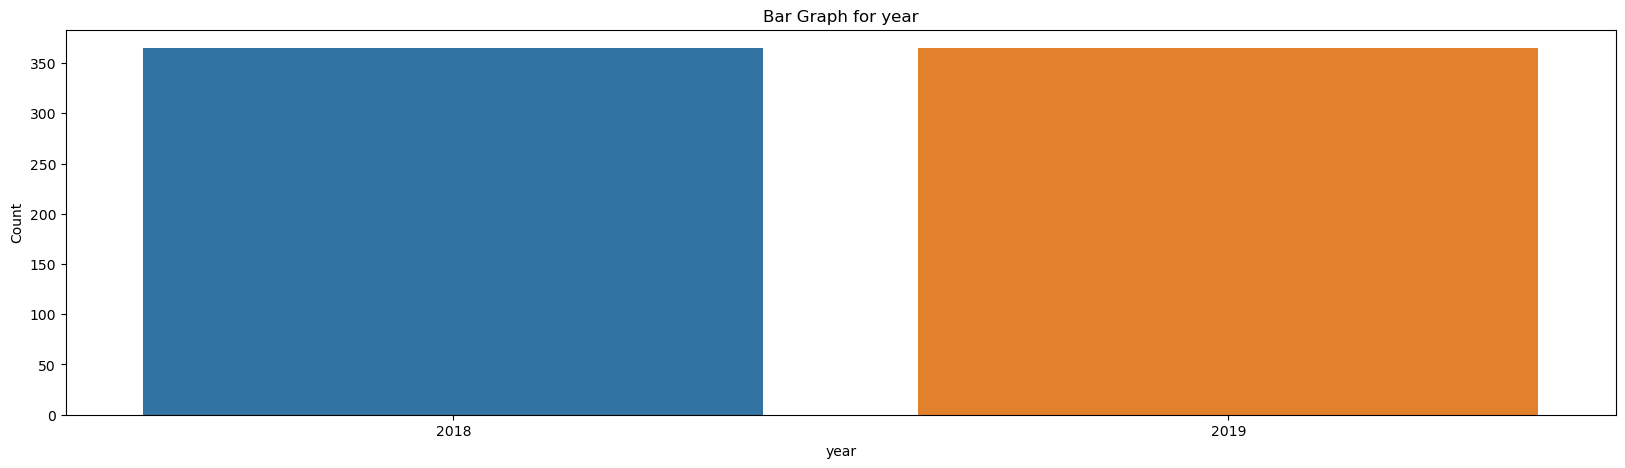

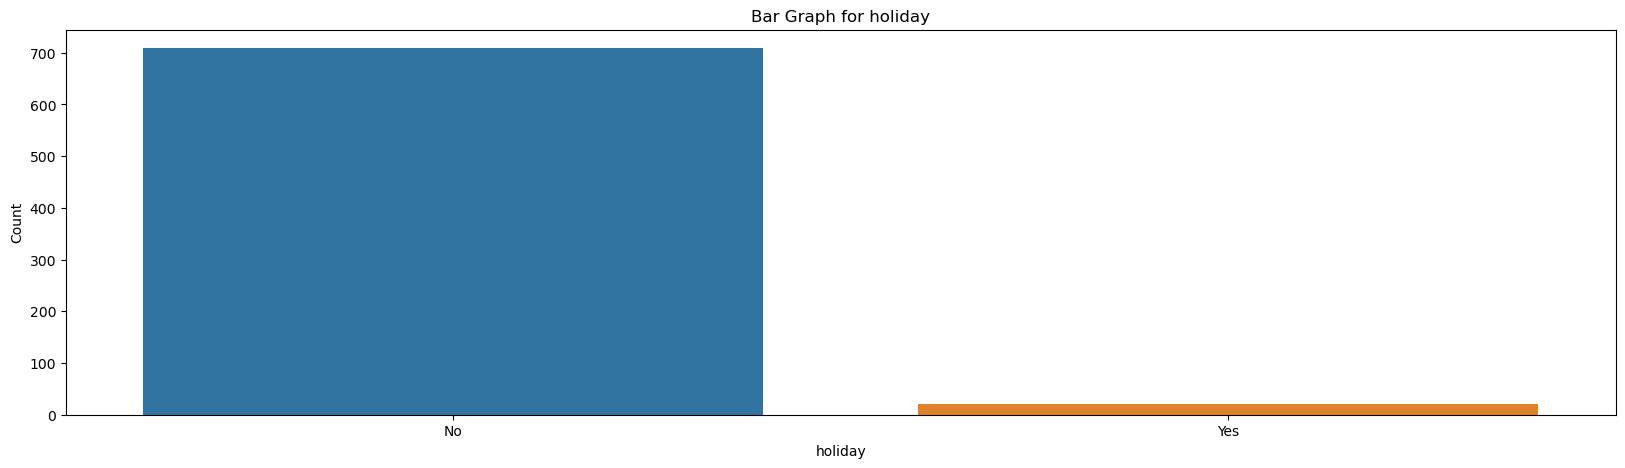

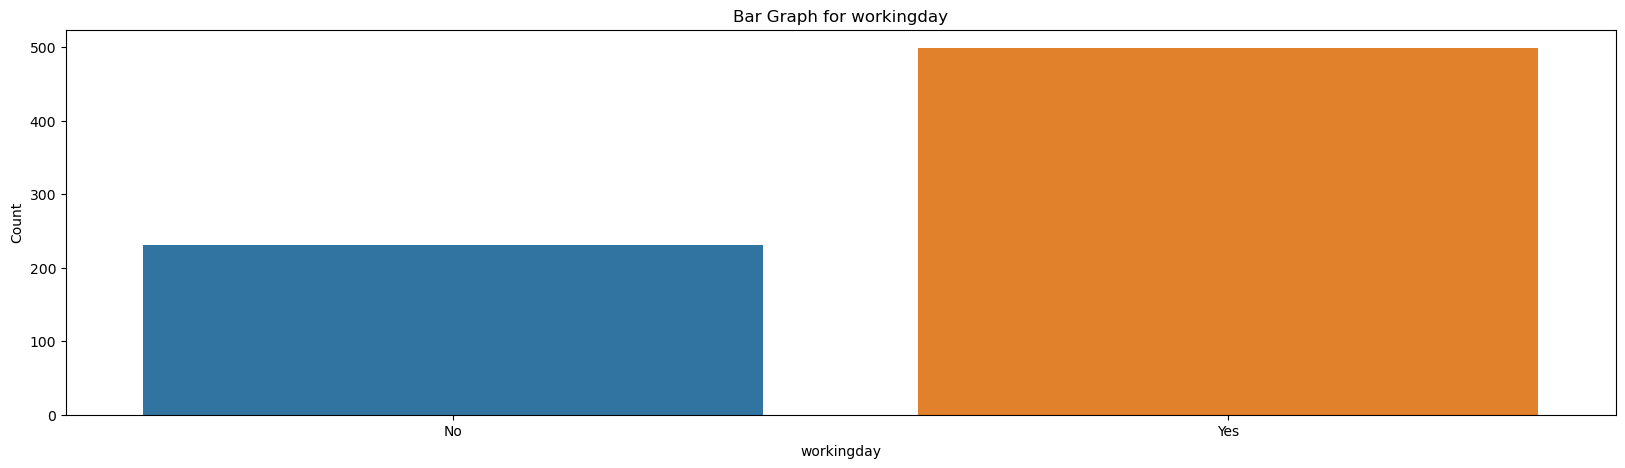

In [187]:
categorical_columns = ['season', 'month', 'weekday', 'weather', 'year', 'holiday', 'workingday']

for col in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Graph for {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

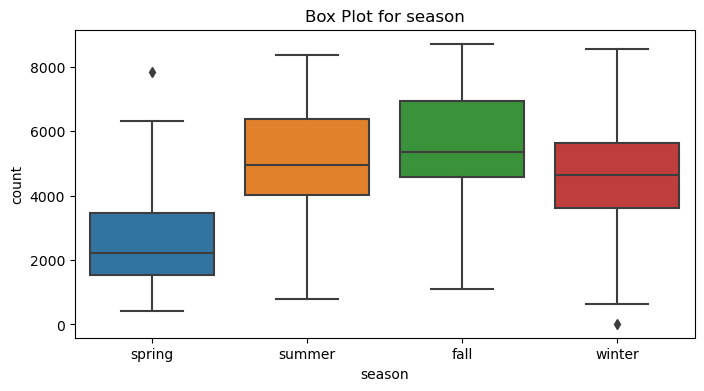

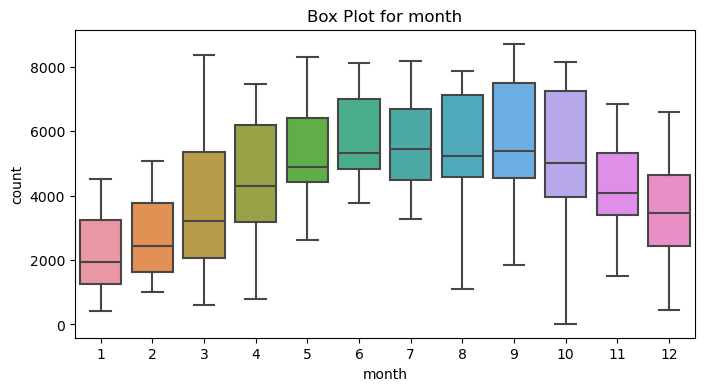

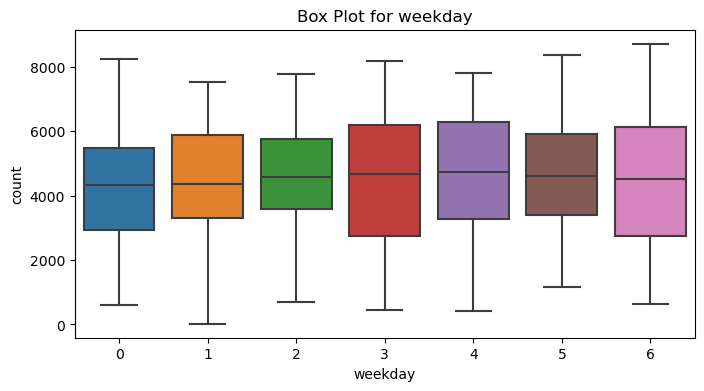

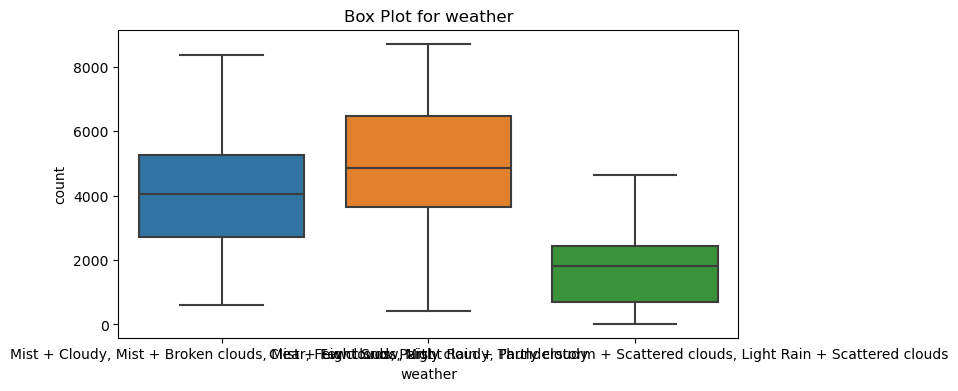

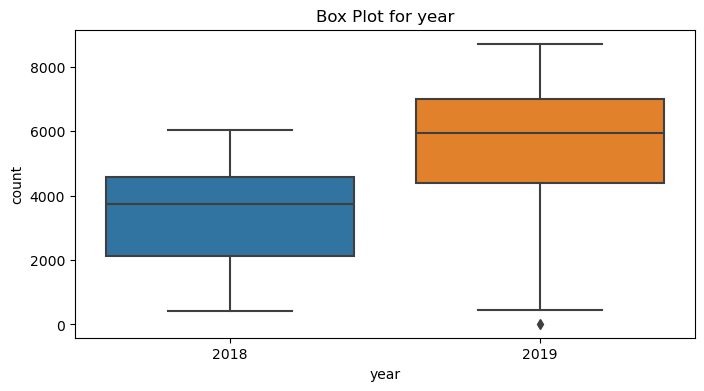

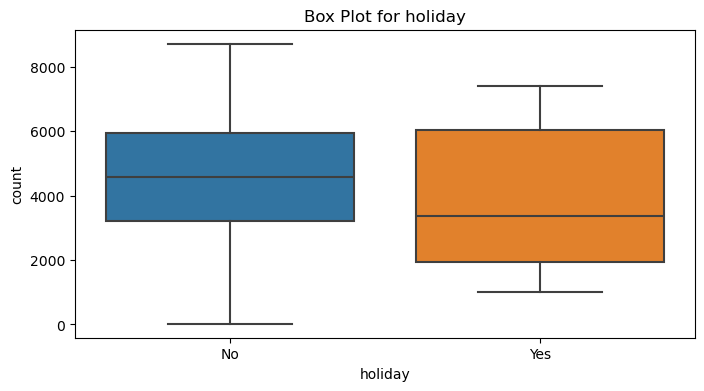

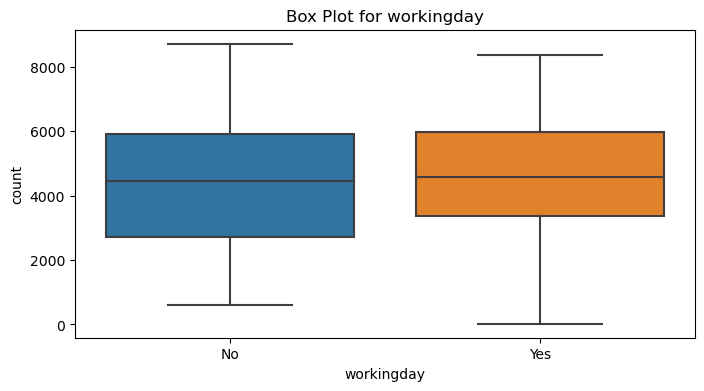

In [188]:
categorical_columns = ['season', 'month', 'weekday', 'weather', 'year', 'holiday', 'workingday']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], y=data['count'])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

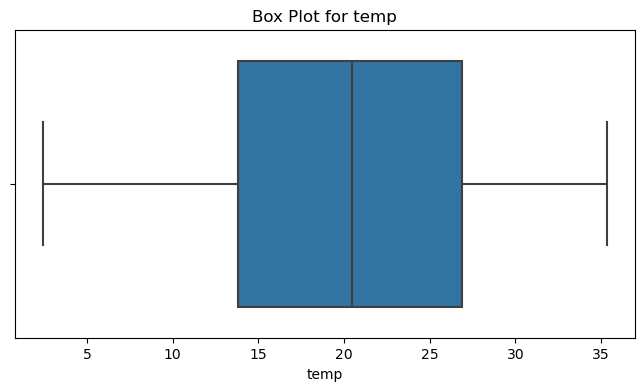

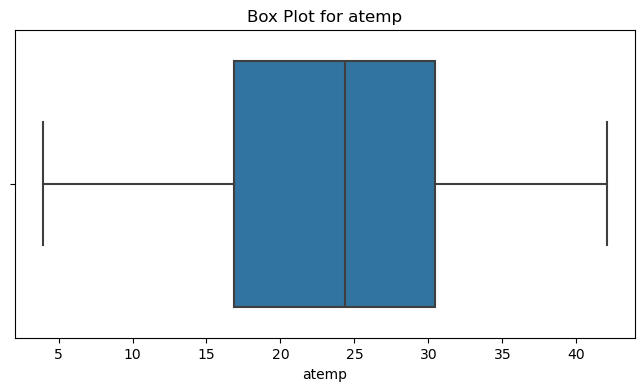

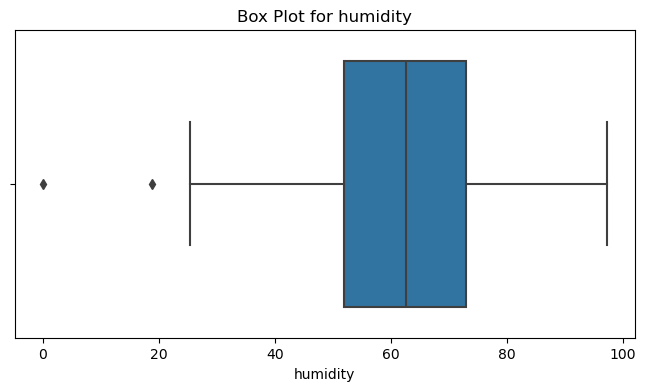

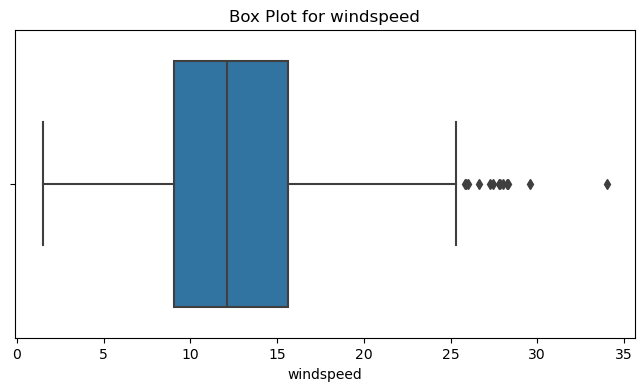

In [189]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()

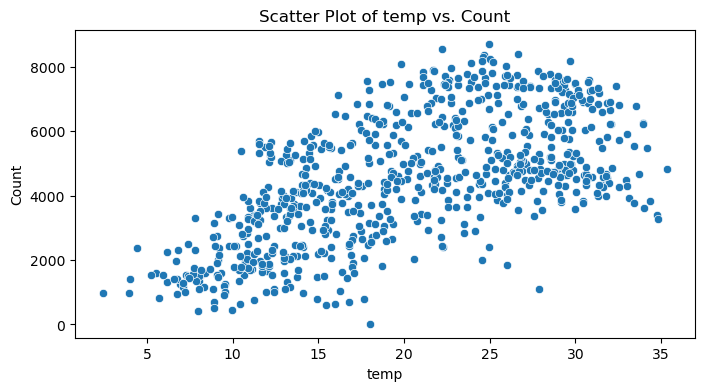

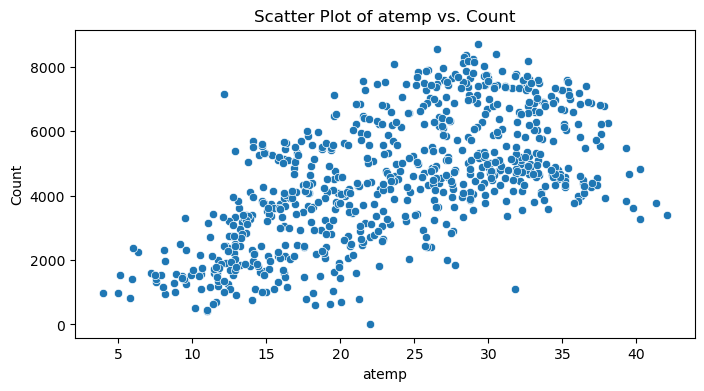

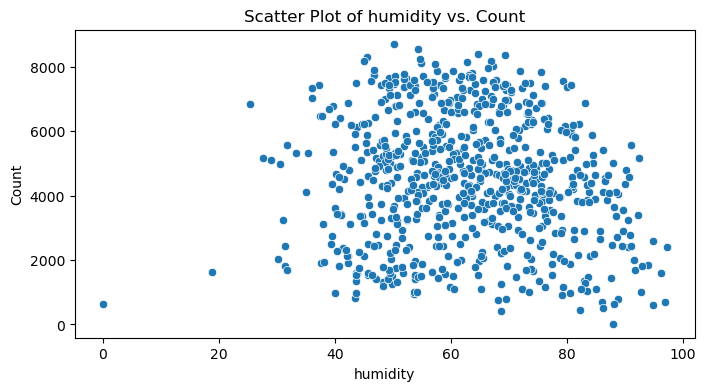

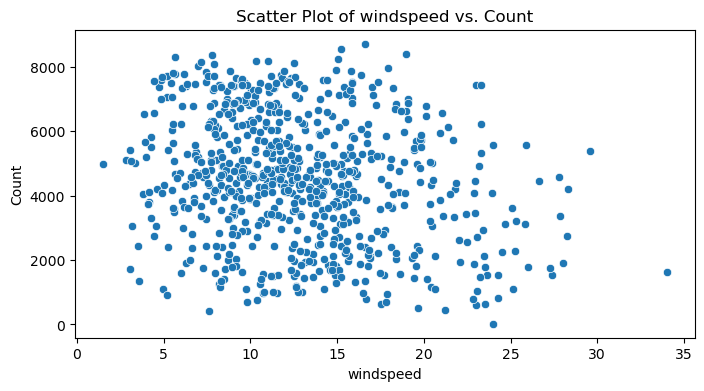

In [190]:

numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[col], y=data['count'], marker='o')
    plt.title(f'Scatter Plot of {col} vs. Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

C:\Users\pgeete\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pgeete\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pgeete\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pgeete\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

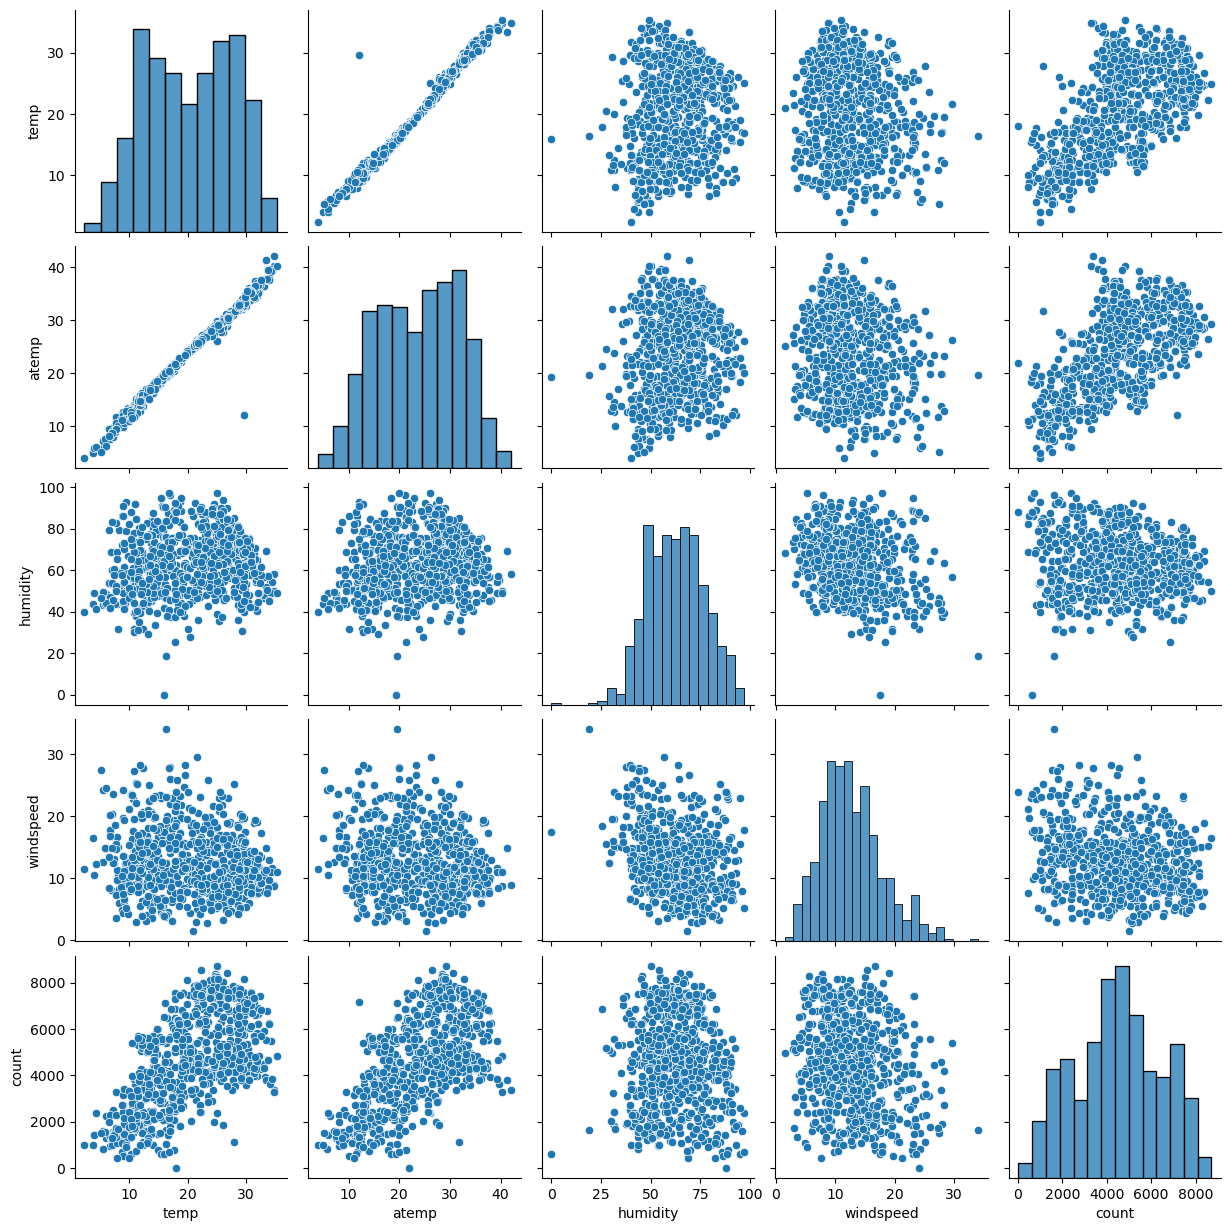

In [191]:
sns.pairplot(data[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.show()

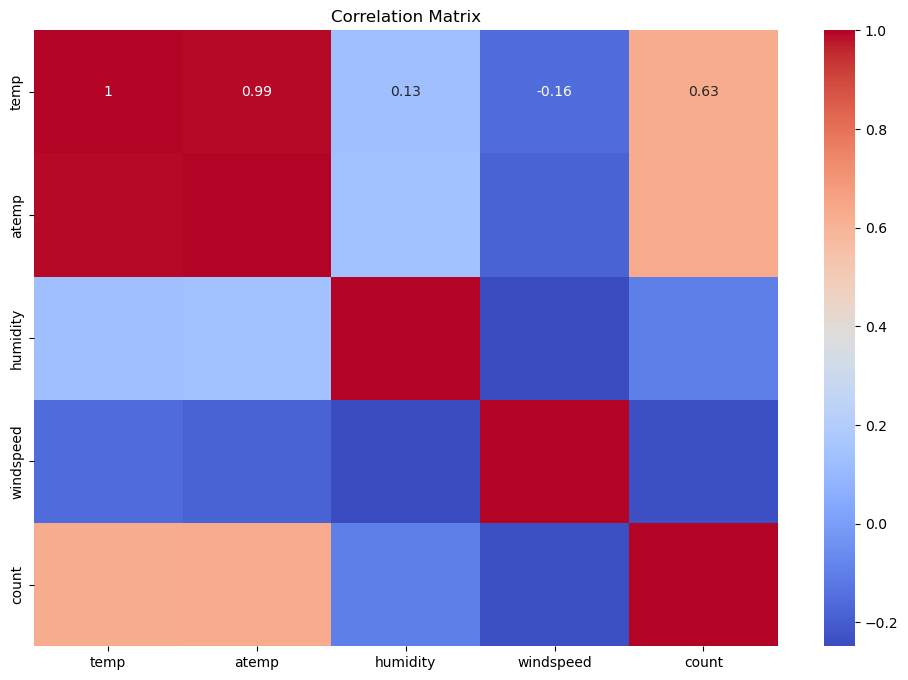

In [192]:

plt.figure(figsize=(12, 8))
corr_matrix = data[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [193]:
# Split data into train and test split 

In [194]:
#Creating Dummy Values for categorical variables
df = pd.DataFrame(data)

data_encode = pd.get_dummies(df, columns=['season','month','weekday','weather','year','holiday','workingday'],drop_first=True)

for col in data_encode.columns:
    if data_encode[col].dtype == 'bool':
        data_encode[col] = data_encode[col].astype(int)

print(data_encode)
print(data_encode.info())

X = data_encode.drop('count', axis=1)

y = data_encode['count']


          temp     atemp  humidity  windspeed  count  season_spring  \
0    14.110847  18.18125   80.5833  10.749882    985              1   
1    14.902598  17.68695   69.6087  16.652113    801              1   
2     8.050924   9.47025   43.7273  16.636703   1349              1   
3     8.200000  10.60610   59.0435  10.739832   1562              1   
4     9.305237  11.46350   43.6957  12.522300   1600              1   
..         ...       ...       ...        ...    ...            ...   
725  10.420847  11.33210   65.2917  23.458911   2114              1   
726  10.386653  12.75230   59.0000  10.416557   3095              1   
727  10.386653  12.12000   75.2917   8.333661   1341              1   
728  10.489153  11.58500   48.3333  23.500518   1796              1   
729   8.849153  11.17435   57.7500  10.374682   2729              1   

     season_summer  season_winter  month_2  month_3  ...  weekday_2  \
0                0              0        0        0  ...          0   
1    

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [196]:
#Adding a Constant To The Model

In [197]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [198]:
model = sm.OLS(y_train, X_train_const).fit()

In [199]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print(vif_data)

                                              Feature         VIF
0                                               const  155.115335
1                                                temp  217.982371
2                                               atemp  201.462930
3                                            humidity    2.039359
4                                           windspeed    1.382582
5                                       season_spring   10.949507
6                                       season_summer    8.210309
7                                       season_winter    8.374022
8                                             month_2    1.784430
9                                             month_3    2.338027
10                                            month_4    6.446715
11                                            month_5    7.819593
12                                            month_6    8.099554
13                                            month_7   10.251105
14        

C:\Users\pgeete\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [200]:
#Droping Some Highly Collinear Variables
X_train_reduced = X_train_const.drop(columns=['holiday_Yes', 'workingday_Yes', 'temp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'])
X_test_reduced = X_test_const.drop(columns=['holiday_Yes', 'workingday_Yes', 'temp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'])

In [201]:
#Recaluclating VIF
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_train_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
print("VIF after removing highly collinear variables:")
print(vif_data_reduced.sort_values(by='VIF', ascending=False))

VIF after removing highly collinear variables:
                                              Feature         VIF
0                                               const  139.802125
4                                       season_spring   10.814704
12                                            month_7    9.658523
6                                       season_winter    8.300625
5                                       season_summer    8.131539
10                                            month_5    7.597760
13                                            month_8    7.586608
11                                            month_6    7.516935
14                                            month_9    7.052065
1                                               atemp    6.426589
9                                             month_4    6.377948
15                                           month_10    6.036837
16                                           month_11    5.557553
17                           

In [202]:
model_reduced = sm.OLS(y_train,X_train_reduced).fit()


Model Performance (Reduced Features):
Mean Squared Error (MSE): 654317.6235366102
R-squared (R²): 0.8236607044049935

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     123.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.95e-180
Time:                        22:44:38   Log-Likelihood:                -4122.9
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     489   BIC:                             8383.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                            

In [ ]:
#making predictions on the test set woth reduced features
y_pred_reduced = model_reduced.predict(X_test_reduced)

In [ ]:
#Evaluateing the reduced model
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

In [ ]:
# Summary of the reduced model
model_summary_reduced = model_reduced.summary()

print("\nModel Performance (Reduced Features):")
print(f"Mean Squared Error (MSE): {mse_reduced}")
print(f"R-squared (R²): {r2_reduced}")
print("\nModel Summary:")
print(model_summary_reduced)